In [18]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
dsn = pd.read_csv('Binary_Classification_Dataset.csv')
dsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_Role         200 non-null    object
 1   Education_Level  200 non-null    object
 2   Marital_Status   200 non-null    object
 3   Age              200 non-null    int64 
 4   Income           200 non-null    int64 
 5   Experience       200 non-null    int64 
 6   Target           200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [6]:
# Identifying categorical and numerical columns
dtype_mapping = dsn.dtypes
categorical_features = dtype_mapping[dtype_mapping == 'object'].index.tolist()
numerical_features = dtype_mapping[dtype_mapping != 'object'].index.tolist()
numerical_features.remove('Target')  # Exclude target variable if numeric

In [7]:
# Column transformer to apply OneHotEncoding to categorical features and scaling to numerical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
])

In [9]:
# Applying transformations
X_processed = preprocessor.fit_transform(dsn.drop(columns=['Target']))

c:\Users\Admin\anaconda3\envs\gaifndtion\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Creating a new DataFrame with transformed data
encoded_feature_names = preprocessor.get_feature_names_out()
df_processed = pd.DataFrame(X_processed, columns=encoded_feature_names)

# Adding back the target column
df_processed['Target'] = dsn['Target'].values

df_processed.head()

,num__Age,num__Income,num__Experience,cat__Job_Role_Clerk,cat__Job_Role_Engineer,cat__Job_Role_Manager,cat__Job_Role_Technician,cat__Education_Level_High School,cat__Education_Level_Master,cat__Education_Level_PhD,cat__Marital_Status_Married,cat__Marital_Status_Single,Target
0,-0.697123,-0.429117,-0.850634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.139759,-0.245086,1.211010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.307136,-0.034585,-0.685703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.144019,1.088684,-1.510361,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,1.646148,-0.710269,0.963613,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [14]:
y = df_processed['Target']

In [15]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [17]:
# Finding the best K using the Elbow Method
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

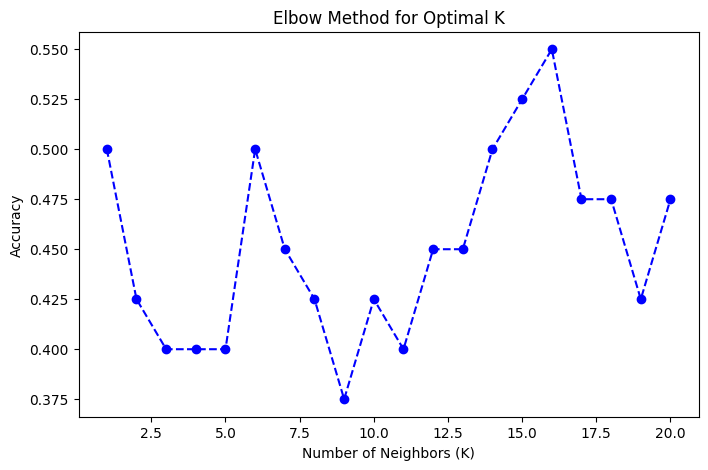

In [19]:
# Plotting the accuracy scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal K')
plt.show()

In [20]:
# Selecting the best K (maximum accuracy)
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K found: {best_k}")

Best K found: 16


In [21]:
# Training a KNN classifier with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [22]:
# Making predictions
y_pred = knn.predict(X_test)

In [28]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [29]:
# Displaying results
print("KNN Classifier Performance with Best K:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

KNN Classifier Performance with Best K:
Accuracy: 0.5500
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.47      0.53      0.50        17

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.56      0.55      0.55        40

